<Figure size 800x400 with 0 Axes>

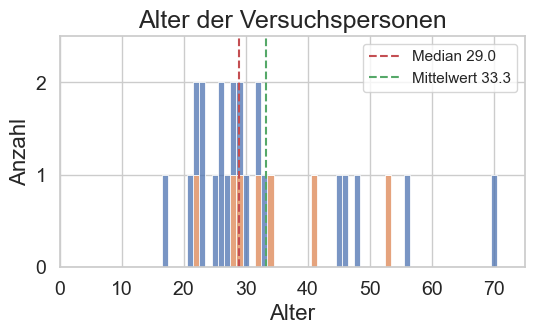

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

fontsizeHeader = 22
fontsizeLabel = 20
fontsize = 18

file_in = '../Versuchsdaten_roh/versuchspersonen.csv'
df = pd.read_csv(file_in, sep=';')

df['Alter'] = 2023 - df['Geburtsjahr']
df['Geschlecht'] = df['Geschlecht'].replace({1: 'Frau', 2: 'Mann'})

#print(df)

plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")

# DataFrame nach Geschlecht aufteilen
male_data = df[df['Geschlecht'] == 'Mann']
female_data = df[df['Geschlecht'] == 'Frau']

plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='Alter', hue='Geschlecht', multiple='stack', discrete=True)

ax = plt.gca()
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xlim(0, max(df['Alter']) + 5)
plt.ylim(0, 2.5)

median = np.median(df['Alter'])
mean = np.mean(df['Alter'])
meanstr = f'{mean:.1f}'

plt.axvline(median, color='r', linestyle='--', label='Median ' + str(median))
plt.axvline(mean, color='g', linestyle='--', label=  'Mittelwert ' + meanstr)

plt.title('Alter der Versuchspersonen', fontsize=fontsizeHeader-4)
plt.xlabel('Alter', fontsize=fontsizeLabel-4)
plt.ylabel('Anzahl', fontsize=fontsizeLabel-4)
plt.xticks(fontsize=fontsize-4)
plt.yticks(fontsize=fontsize-4)
plt.legend()
plt.savefig('../Visualisierungen/versuchspersonen/alter.png', dpi=300)
plt.show()